# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN


ImportError: cannot import name 'Sequential' from 'keras.layers' (/usr/local/lib/python3.11/dist-packages/keras/api/layers/__init__.py)

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

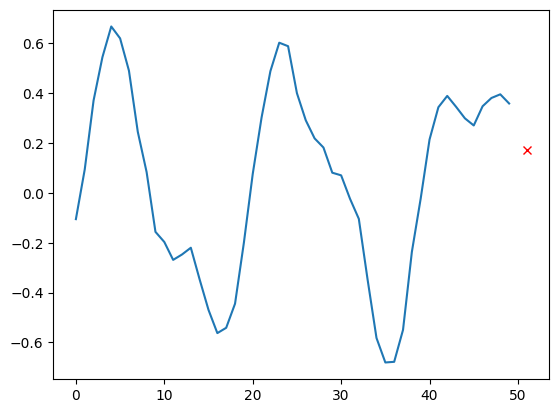

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [10]:
from keras.models import Sequential
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Model building
from keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [13]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1720 - mean_squared_error: 0.1720 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0133 - val_mean_squared_error: 0.0133


In [15]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

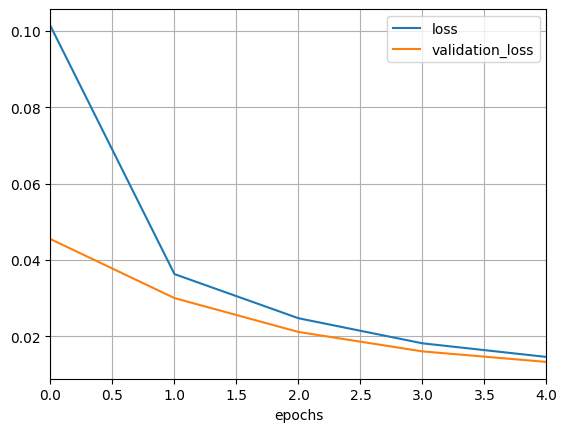

In [16]:
plot_function(history_linear)

In [17]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.012989724986255169
Test MSE:  0.012989724986255169


### 1.5 Simple RNN Model

In [18]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [20]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2690 - mean_squared_error: 0.2690 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.0766 - val_mean_squared_error: 0.0766
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.0447 - val_mean_squared_error: 0.0447


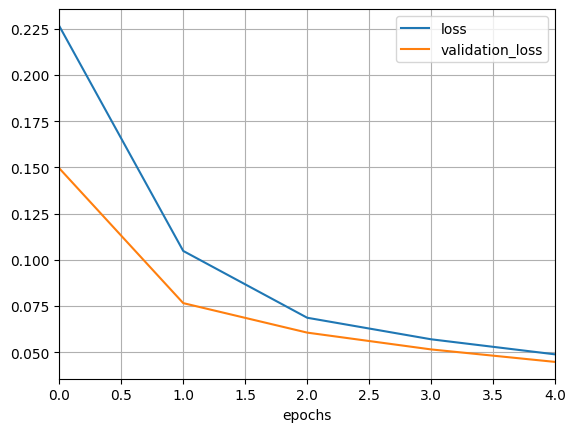

In [21]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [22]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [23]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [24]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


In [25]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0040146061219275
Test MSE:  0.0040146061219275


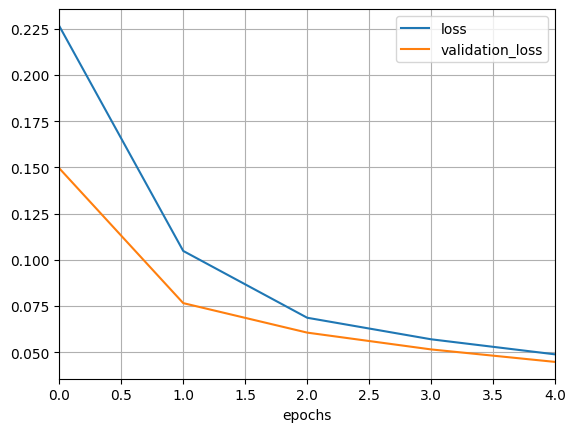

In [26]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [31]:
!pip install tensorflow

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras
import tensorflow.keras as keras # Use tensorflow.keras
import numpy as np
from tensorflow.keras.models import Sequential # Use tensorflow.keras
from tensorflow.keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU # Use tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Use tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam # Use tensorflow.keras



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.1 - Load dataset

In [33]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [34]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [36]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [37]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [38]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
optimizer = Adam(learning_rate = 0.001)

In [40]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.4959 - loss: 0.7107 - val_accuracy: 0.4938 - val_loss: 0.6959
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4993 - loss: 0.6967 - val_accuracy: 0.5062 - val_loss: 0.6936
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.5007 - loss: 0.6956 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5097 - loss: 0.6951 - val_accuracy: 0.5062 - val_loss: 0.6938
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.4974 - loss: 0.6955 - val_accuracy: 0.5062 - val_loss: 0.6969


In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6981276273727417
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results